In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')#画图工具
from pylab import mpl #matplotlib中的一部分
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [3]:
data_kdgd = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/幼儿园.csv")
data_pmsc = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/中小学.csv")
data_trn = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/外语培训.csv")
data_clg = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/职业院校.csv")
# data_tic = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/teachinchina.csv")
data_jlc = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/jobleadchina.csv")
# data_gm = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/groupmembers.csv")

In [4]:
data_kdgd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         189 non-null    object
 1   company      189 non-null    object
 2   exp_title    189 non-null    object
 3   link         189 non-null    object
 4   salary       189 non-null    object
 5   title        189 non-null    object
 6   update_time  189 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB


In [5]:
data_kdgd.sample(5)

,area,company,exp_title,link,salary,title,update_time
63,北京-海淀区,北京新东方,不限/大学本科以上,/jobs_view_381957.html,0.8W-1W/年,少儿英语教师,2019/04/04
107,广东-广州,广州市增城思贝睿教育咨询信息服务部,一年以上/大专以上,/jobs_view_428443.html,6K-8K/月,幼儿英语教师,2019/04/04
40,上海-闵行区,上海凝志文化传播有限公司,不限/大学本科以上,/jobs_view_433852.html,6K-12K/月,少儿英语老师,2019/04/04
167,浙江-杭州-江干区,杭州星锐培训学校有限公司（吉的堡）,应届毕业生/大专以上,/jobs_view_408796.html,3K-6K/月,实习少儿英语老师,2019/03/27
97,广东-广州,广州市海珠区俊华培训中心,不限/大专以上,/jobs_view_430617.html,3.8K-5K/月,幼儿英语教师,2019/04/04


In [6]:
# 把来自万行教师的四个数据集组合成一个Dataframe
data_kdgd['type'] = '幼儿园'
data_pmsc['type'] = '中小学'
data_trn['type'] = '外语培训'
data_clg['type'] = '职业院校'
data_wx = pd.concat([data_kdgd, data_pmsc, data_trn, data_clg])

In [7]:
data_wx.info()
data_wx.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 0 to 27
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         5787 non-null   object
 1   company      5787 non-null   object
 2   exp_title    5787 non-null   object
 3   link         5787 non-null   object
 4   salary       5787 non-null   object
 5   title        5787 non-null   object
 6   update_time  5787 non-null   object
 7   type         5787 non-null   object
dtypes: object(8)
memory usage: 406.9+ KB


,area,company,exp_title,link,salary,title,update_time,type
211,广东-东莞,树童教育集团,一年以上/大学本科以上,/jobs_view_394135.html,8K-12K/月,中小学英语老师（莞城塞纳河畔分校）,2019/04/06,中小学
1530,浙江-湖州-安吉县,浙江安吉振民高级中学（杭州附近）,不限/不限,/jobs_view_287753.html,5K-10K/月,初中英语,2019/04/04,中小学
2601,广东-深圳-龙华区,深圳市阳光之家教育发展有限公司,一年以上/大专,/jobs_view_420672.html,4K-8K/月,小学英语教师,2019/04/04,中小学
5059,甘肃-兰州,兰州碧桂园学校,两年以上/大学本科以上,/jobs_view_416069.html,10W-20W/年,国际部英语教师,2019/03/06,中小学
133,广东-东莞,上海交通大学昂立教育集团东莞分校,不限/大专以上,/jobs_view_399191.html,8K-15K/月,少儿英语机构 执行校长,2019/04/04,外语培训
49,广东-佛山-顺德区,树童教育集团,一年以上/大专以上,/jobs_view_414919.html,6K-10K/月,少儿英语老师（北滘分校）,2019/04/06,外语培训
3922,江西-九江-彭泽县,九江彭泽火炬中学,不限/大学本科以上,/jobs_view_200708.html,4K-8K/月,高中英语教师,2019/04/02,中小学
2316,广东-揭阳-普宁市,广东省普宁市华美实验学校,三年以上/大学本科以上,/jobs_view_167241.html,12W-20W/年,高中英语,2019/04/04,中小学
1026,上海-宝山区,上海行致教育,不限/大专以上,/jobs_view_430924.html,8K-12K/月,小学英语教师,2019/04/04,中小学
4355,浙江-丽水-青田县,浙江省青田县伯温中学,不限/不限,/jobs_view_410726.html,10W-20W/年,高薪诚聘初中英语教师3名,2019/04/01,中小学


In [8]:
data_wx.sample(5)

,area,company,exp_title,link,salary,title,update_time,type
3223,湖南-湘潭,湘潭凤凰中学,不限/大学本科,/jobs_view_424127.html,7W-14W/年,年薪7万-15万诚聘高中英语教师,2019/04/03,中小学
4634,安徽-滁州-南谯区,滁州外国语学校,不限/大学本科,/jobs_view_413136.html,4.5K-6K/月,小学英语教师,2019/03/27,中小学
3069,广东-汕头-潮阳区,汕头市潮阳区德兴育才学校,一年以上/大专以上,/jobs_view_343289.html,5K-7K/月,初中英语教师,2019/04/03,中小学
180,广东-佛山-禅城区,卓越教育集团-优学事业部-佛山分校,不限/大学本科以上,/jobs_view_417457.html,10K-15K/月,英语学科主任,2019/04/04,外语培训
2514,北京-海淀区,北京皓博精英教育科技有限公司,三年以上/大学本科以上,/jobs_view_429837.html,8K-10K/月,初中英语教师（兼职）,2019/04/04,中小学


### 万行教师数据清洗
- 清洗出省份、城市
- 经验、学历
- 工资

#### 1. 清洗出省份、城市

In [9]:
data_wx['area'].sample(10)

539      福建-三明-沙县
2764    广西-柳州-城中区
4186     安徽-淮南-寿县
448     广东-深圳-宝安区
4091    贵州-遵义-仁怀市
4766    广东-广州-花都区
567         广东-惠州
362         广东-梅州
4642    广东-清远-清新区
3647        浙江-温州
Name: area, dtype: object

In [10]:
data_wx['area'].str.split("-", expand=True).sample(100)

,0,1,2
3555,广东,东莞,None
912,广东,深圳,盐田区
287,广东,东莞,None
2231,四川,成都,青羊区
1348,河南,郑州,None
...,...,...,...
2365,广东,广州,番禺区
478,浙江,杭州,建德市
1889,上海,浦东新区,None
3220,浙江,宁波,象山县


In [11]:
data_wx['province'] = data_wx['area'].str.split("-", expand=True)[0]
data_wx['city'] = data_wx['area'].str.split("-", expand=True)[1]
# 把北京、天津、上海、重庆的城市改为原来的名字
data_wx.loc[data_wx['province'] == '北京', 'city'] = '北京'
data_wx.loc[data_wx['province'] == '上海', 'city'] = '上海'
data_wx.loc[data_wx['province'] == '天津', 'city'] = '天津'
data_wx.loc[data_wx['province'] == '重庆', 'city'] = '重庆'

#### 2. 清洗出经验、学历

In [12]:
data_wx['exp_title'].sample(5)

2427      不限/大学本科以上
1450      不限/大学本科以上
358       不限/大学本科以上
3939    三年以上/大学本科以上
119       不限/大学本科以上
Name: exp_title, dtype: object

In [13]:
data_wx['exp'] = data_wx['exp_title'].str.split("/", expand=True)[0]
data_wx['degree'] = data_wx['exp_title'].str.split("/", expand=True)[1]

In [14]:
print(data_wx['exp'].unique())
print(data_wx['degree'].unique())

['不限' '一年以上' '三年以上' '两年以上' '五年以上' '应届毕业生' '六年以上' '四年以上' '九年以上' '七年以上'
 '十年以上' '在读学生' '八年以上']
['大专' '不限' '大学本科以上' '大学本科' '大专以上' '不限以上' '中专以上' '硕士以上' '硕士' '高中以上' '中专']


In [15]:
exp_map = {'不限':'经验不限', '一年以上':'一到三年', '三年以上':'三到五年', '两年以上':'一到三年',
           '五年以上':'五到十年', '应届毕业生':'经验不限', '六年以上':'五到十年', '四年以上':'三到五年',
           '九年以上':'五到十年', '七年以上':'五到十年', '十年以上':'十年以上', '在读学生':'经验不限', 
           '八年以上':'五到十年'}
data_wx['exp'] = data_wx['exp'].map(exp_map)
print(data_wx['exp'].sample(10))
print(data_wx['degree'].unique())

2044    经验不限
5165    经验不限
16      一到三年
4862    经验不限
4399    经验不限
4901    经验不限
3320    三到五年
3895    三到五年
2942    三到五年
4408    一到三年
Name: exp, dtype: object
['大专' '不限' '大学本科以上' '大学本科' '大专以上' '不限以上' '中专以上' '硕士以上' '硕士' '高中以上' '中专']


In [16]:
data_wx['degree'].unique()

array(['大专', '不限', '大学本科以上', '大学本科', '大专以上', '不限以上', '中专以上', '硕士以上', '硕士',
       '高中以上', '中专'], dtype=object)

In [17]:
degree_map = {'大专':'大专', '不限':'学历不限', '大学本科以上':'本科', '大学本科':'本科', 
              '大专以上':'大专', '不限以上':'学历不限', '中专以上':'中专', '硕士以上':'硕士', 
              '硕士':'硕士', '高中以上':'高中', '中专':'中专'}
data_wx['degree'] = data_wx['degree'].map(degree_map)
print(data_wx['degree'])
print(data_wx['degree'].unique())
print(data_wx.sample(1))

0       大专
1     学历不限
2       本科
3       本科
4       本科
      ... 
23      本科
24      大专
25      本科
26      本科
27      本科
Name: degree, Length: 5787, dtype: object
['大专' '学历不限' '本科' '中专' '硕士' '高中']
       area     company exp_title                    link       salary  \
5109  广东-广州  广州市花都区新晖学校   不限/大专以上  /jobs_view_131148.html  3.5K-4.5K/月   

       title update_time type province city   exp degree  
5109  小学英语教师  2019/02/19  中小学       广东   广州  经验不限     大专  


In [18]:
data_wx.sample(5)

,area,company,exp_title,link,salary,title,update_time,type,province,city,exp,degree
3476,河北-唐山,河北唐山金桥道尔顿国际学校2019校招,应届毕业生/大学本科,/jobs_view_432262.html,5W-10W/年,高中英语老师,2019/04/03,中小学,河北,唐山,经验不限,本科
4568,安徽-滁州,安徽省滁州阳之光高级中学,不限/大学本科以上,/jobs_view_428555.html,7W-14W/年,初中英语教师,2019/03/28,中小学,安徽,滁州,经验不限,本科
3296,广东-东莞,东莞市石碣学易优培训中心,不限/大学本科以上,/jobs_view_398549.html,10W-16W/年,初中英语骨干教师（10-16w）,2019/04/03,中小学,广东,东莞,经验不限,本科
2366,广东-广州,广州超会学教育科技有限公司,不限/大学本科以上,/jobs_view_364356.html,10K-15K/月,小学英语教师,2019/04/04,中小学,广东,广州,经验不限,本科
105,浙江-宁波-慈溪市,慈溪市纬赛尔新教育实验学校,不限/大学本科,/jobs_view_421807.html,9W-15W/年,初中英语教师,2019/04/03,中小学,浙江,宁波,经验不限,本科


#### 3. 清洗出工资

In [19]:
data_wx['salary'].unique()

array(['10W-12W/年', '3.5K-7K/月', '6K-10K/月', '8K-12K/月', '5K-10K/月',
       '8K-15K/月', '5K-8K/月', '7K-10K/月', '8K-10K/月', '6K-8K/月',
       '8W-12W/年', '5K-6K/月', '4K-6K/月', '9W-12W/年', '4.5K-6K/月',
       '4K-8K/月', '8W-8W/年', '4K-5.5K/月', '3K-5K/月', '4.5K-8K/月',
       '2.8K-3.5K/月', '6K-12K/月', '6W-9W/年', '10W-15W/年', '10K-15K/月',
       '4K-7K/月', '3K-6K/月', '8W-8.5W/年', '6K-7.5K/月', '9K-18K/月',
       '0.8W-1W/年', '2K-3K/月', '6W-12W/年', '7K-12K/月', '2.6K-5K/月',
       '6W-8W/年', '5.5K-5.7K/月', '6.4K-8.4K/月', '3.5K-6K/月', '6.5W-10W/年',
       '3.8K-5K/月', '8W-15W/年', '12K-22K/月', '10K-16K/月', '3.5K-8K/月',
       '1.8K-4K/月', '3K-4K/月', '4W-8W/年', '5W-10W/年', '5K-7K/月',
       '4.8W-8W/年', '2K-4K/月', '10K-14K/月', '3.5K-4.6K/月', '10W-20W/年',
       '2.5K-3K/月', '4.5W-6.5W/年', '面议', '3.5K-4.5K/月', '8W-16W/年',
       '4W-7W/年', '3K-4.5K/月', '4W-6W/年', '8K-16K/月', '9W-16W/年',
       '7.5W-13W/年', '20K-28K/月', '7K-11K/月', '5W-6W/年', '13W-13W/年',
       '3.5K-4K/月', '2K-2K/月', '9W-18W/年'

In [20]:
def get_salary(data):
    pat_K = r"(.*)K-(.*)K"
    pat_W = r"(.*)W-(.*)W"
    pat = r"(.*)-(.*)/"
    if '面议' in data:
        return np.nan
    if '享公办教师薪资待遇' in data:
        return np.nan
    if 'K' in data and '月' in data:
        low, high = re.findall(pattern=pat_K, string=data)[0]
        return (float(low)+float(high))/2
    if 'W' in data and '年' in data:
        low, high = re.findall(pattern=pat_W, string=data)[0]
        return (float(low)+float(high))/2*10/12
    if 'K' not in data and '月' in data:
        low, high = re.findall(pattern=pat, string=data)[0]
        return (float(low)+float(high))/2/1000

data_wx['salary_clean'] = data_wx['salary'].apply(get_salary)

In [21]:
data_wx['salary_clean'] = np.round(data_wx['salary_clean'], 1)

In [22]:
data_wx.sample(5)

,area,company,exp_title,link,salary,title,update_time,type,province,city,exp,degree,salary_clean
4928,四川-成都-青羊区,戴氏教育科技有限公司,一年以上/大学本科,/jobs_view_403673.html,6K-8K/月,急聘少儿英语教师（总部上班）,2019/03/18,中小学,四川,成都,一到三年,本科,7.0
4813,福建-莆田,莆田擢英中学,应届毕业生/大学本科以上,/jobs_view_330073.html,4K-5K/月,高中英语教师,2019/03/22,中小学,福建,莆田,经验不限,本科,4.5
4228,贵州-六盘水-水城县,六盘水外国语实验学校,五年以上/大学本科以上,/jobs_view_363402.html,15W-30W/年,诚聘高中骨干英语教师,2019/04/01,中小学,贵州,六盘水,五到十年,本科,18.8
4293,广东-肇庆-四会市,四会市中文学校,不限/大专以上,/jobs_view_373623.html,6K-8K/月,初中英语教师,2019/04/01,中小学,广东,肇庆,经验不限,大专,7.0
1206,江苏-徐州-铜山区,徐州市铜山区新星学校,不限/不限,/jobs_view_387959.html,4K-8K/月,小学英语教师,2019/04/04,中小学,江苏,徐州,经验不限,学历不限,6.0


### JobLeadChina数据清洗
- 清洗出“exp_title”
- 清洗出“salary”

In [23]:
data_jlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area         954 non-null    object
 1   com_type     954 non-null    object
 2   company      954 non-null    object
 3   education    954 non-null    object
 4   exp_title    954 non-null    object
 5   link         954 non-null    object
 6   salary       954 non-null    object
 7   title        954 non-null    object
 8   update_time  954 non-null    object
dtypes: object(9)
memory usage: 67.2+ KB


In [24]:
data_jlc.sample(5)

,area,com_type,company,education,exp_title,link,salary,title,update_time
177,Others,School,Expert International Education,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/2293,14K/MTH - 18K/MTH,Career Awareness Instructor,"Post time: October 24, 2018"
18,Beijing,School,Wisdom Education Group,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/3890,13K/MTH - 20K/MTH,Full-time Kindergarten teachers needed in var...,"Post time: March 21, 2019"
208,Chengdu,Outsourcing,Relevant,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/2588,14K/MTH - 14K/MTH,Full-Time English Teachers are needed now,"Post time: September 11, 2018"
837,Beijing,Teaching Center,Wilshire Global Consulting,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/446,12K/MTH - 18K/MTH,English Teacher,"Post time: March 10, 2017"
89,Others,School,PalFish Education,Any education,Experience: Director,http://www.jobleadchina.com/job/3284,15K/MTH - 30K/MTH,Online English Teacher,"Post time: January 23, 2019"


#### 1. 清洗出exp_title

In [25]:
data_jlc['exp_title'].unique()

array(['Experience: Mid-Senior Level', 'Experience: Entry Level',
       'Experience: Associate', 'Experience: Director',
       'Experience: Executive', 'Experience: Internship'], dtype=object)

In [26]:
data_jlc['exp_title_clean'] = data_jlc['exp_title'].str.split(": ", expand=True)[1]
data_jlc['exp_title_clean']

0      Mid-Senior Level
1           Entry Level
2      Mid-Senior Level
3      Mid-Senior Level
4           Entry Level
             ...       
949    Mid-Senior Level
950           Executive
951           Associate
952           Associate
953            Director
Name: exp_title_clean, Length: 954, dtype: object

#### 2. 清洗出salary

In [27]:
data_jlc['salary'].unique()
re.findall(pattern=r"(.*)K/MTH - (.*)K/MTH", string=data_jlc['salary'][0])[0]

('15000', '20000')

In [28]:
r=data_jlc['salary'].unique()
for f in r:
    print(f)
    b,c=re.findall(pattern=r"(.*)K/MTH - (.*)K/MTH", string=f)[0]
    print(b)
    print(c)

15000K/MTH - 20000K/MTH
15000
20000
13K/MTH - 26K/MTH
13
26
13K/MTH - 18K/MTH
13
18
10000K/MTH - 20000K/MTH
10000
20000
15K/MTH - 22K/MTH
15
22
8000K/MTH - 20000K/MTH
8000
20000
20K/MTH - 25K/MTH
20
25
16K/MTH - 23K/MTH
16
23
8K/MTH - 14K/MTH
8
14
15K/MTH - 18K/MTH
15
18
20000K/MTH - 30000K/MTH
20000
30000
13K/MTH - 20K/MTH
13
20
11K/MTH - 16K/MTH
11
16
20K/MTH - 28K/MTH
20
28
6000K/MTH - 20000K/MTH
6000
20000
8K/MTH - 18K/MTH
8
18
20K/MTH - 30K/MTH
20
30
8000K/MTH - 18000K/MTH
8000
18000
12K/MTH - 16K/MTH
12
16
13000K/MTH - 16000K/MTH
13000
16000
14K/MTH - 18K/MTH
14
18
15K/MTH - 30K/MTH
15
30
12K/MTH - 25K/MTH
12
25
8K/MTH - 20K/MTH
8
20
13K/MTH - 25K/MTH
13
25
13K/MTH - 16K/MTH
13
16
10K/MTH - 30K/MTH
10
30
8K/MTH - 12K/MTH
8
12
20K/MTH - 26K/MTH
20
26
26K/MTH - 28K/MTH
26
28
13000K/MTH - 25000K/MTH
13000
25000
13000K/MTH - 15000K/MTH
13000
15000
15K/MTH - 25K/MTH
15
25
12000K/MTH - 20000K/MTH
12000
20000
18K/MTH - 25K/MTH
18
25
16000K/MTH - 19000K/MTH
16000
19000
12K/MTH - 17K/MTH


In [29]:
def get_salary_jlc(data):
    pat_jlc = r"(.*)K/MTH - (.*)K/MTH"
    if '00' in data:
        low, high = re.findall(pattern=pat_jlc, string=data)[0]
        return (float(low)+float(high))/2/1000
    else:
        low, high = re.findall(pattern=pat_jlc, string=data)[0]
        return (float(low)+float(high))/2

data_jlc['salary_clean'] = data_jlc['salary'].apply(get_salary_jlc)

In [30]:
data_jlc.sample(5)

,area,com_type,company,education,exp_title,link,salary,title,update_time,exp_title_clean,salary_clean
163,Hangzhou,School,Hailiang ECE,Bachelor,Experience: Associate,http://www.jobleadchina.com/job/2901,15K/MTH - 18K/MTH,Foreign Kindergarten Teacher,"Post time: November 13, 2018",Associate,16.5
399,Beijing,Consultancy/Legal/Admin,JingJobs,Bachelor,Experience: Entry Level,http://www.jobleadchina.com/job/1891,20K/MTH - 30K/MTH,Student Recruitment Officer at China Admissions,"Post time: May 03, 2018",Entry Level,25.0
598,Beijing,Teaching Center,威尔式教育,Any education,Experience: Entry Level,http://www.jobleadchina.com/job/1160,2K/MTH - 10K/MTH,ESL Teacher,"Post time: September 21, 2017",Entry Level,6.0
133,Beijing,School,T-school,Bachelor,Experience: Mid-Senior Level,http://www.jobleadchina.com/job/3120,20K/MTH - 40K/MTH,"Subject teacher for G3-G9 (English, Mathematic...","Post time: December 10, 2018",Mid-Senior Level,30.0
667,Beijing,Teaching Center,ESL JOB IN CHINA,Any education,Experience: Executive,http://www.jobleadchina.com/job/766,10000K/MTH - 17000K/MTH,ENGLISH TEACHER,"Post time: July 14, 2017",Executive,13.5


### 微信群成员数据清洗

In [31]:
data_gm.info()

NameError: name 'data_gm' is not defined

In [ ]:
data_gm.sample(5)

In [ ]:
data_gm.iloc[99]

In [ ]:
data_gm = data_gm[['NickName', 'City', 'Province', 'Sex', 'Signature']]

In [ ]:
data_gm.to_csv("data_gm.csv", index=False)

### 问题：
1. 洋外教的工资真的高吗？
2. 市场对于洋外教的经验和学历要求如何？
3. 哪些地区对洋外教的需求多？
4. 什么机构在招聘洋外教？
5. 洋外教来源真的很乱吗？

# 1. 洋外教的工资真的高吗？

In [ ]:
data_jlc.info()
data_jlc.sample(5)

In [ ]:
data_wx.info()

In [ ]:
data_wx.drop(data_wx[data_wx['salary_clean']>40].index, inplace=True)

In [ ]:
data_wx['teacher_type'] = '中教'
data_jlc['teacher_type'] = '外教'
data_salary = pd.concat([data_wx[['salary_clean', 'teacher_type']],
                        data_jlc[['salary_clean', 'teacher_type']]])
data_salary.rename(columns={'salary_clean':'工资', 'teacher_type':'教师类型'}, inplace=True)
data_salary.sample(10)

In [ ]:
# sns.set(font_scale=1.5)
g = sns.FacetGrid(data_salary, "教师类型", size=10, aspect=2, xlim=(0,100))
g.map(sns.distplot, "工资", rug=False)

In [ ]:
np.round(data_jlc['salary_clean'].mean(), 0)

In [ ]:
np.round(data_wx['salary_clean'].mean(), 0)

In [ ]:
data_wx.groupby('city')['salary_clean'].mean().mean()

In [ ]:
np.round(data_wx.groupby('city')['salary_clean'].mean().sort_values()[1:10], 1)

In [ ]:
# 通过经验进行对比
data_jlc.loc[data_jlc['exp_title_clean']=='Associate', 'exp_title_clean'] = 'Entry Level'

In [ ]:
np.round(data_jlc.groupby('exp_title_clean')['salary_clean'].mean(), 1)

In [ ]:
np.round(data_wx.groupby('exp')['salary_clean'].mean(), 1)

'经验不限',     '一到三年',                '三到五年',    '五到十年',           '十年以上'
'Internship', 'Entry Level'+'Associate', 'Executive', 'Mid-Senior Level', 'Director'

In [ ]:
from pyecharts.charts import Bar
import matplotlib.pyplot as plt
import seaborn as sns

attr = ['经验不限\nInternship', '一到三年\nEntry Level', '三到五年\nExecutive',
        '五到十年\nMid-Senior', '十年以上\nDirector']
value1 = [10.1, 15.8, 14.0, 15.8, 20.9]
value2 = [7.8, 8.0, 10.1, 13.6, 21.6]
# plt.plot(value1, value2)#画出折线图
plt.hist(value1, bins=10)
plt.hist(value2, bins=10)
# plt.pie(x = value2, labels=attr)
plt.show
# bar = Bar("不同工作经验的英语外教与中教工资对比")
# bar.add_yaxis("外教", attr, value1, xaxis_label_textsize=18, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar.add_yaxis("中教", attr, value2, xaxis_label_textsize=18, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar

In [ ]:
# 通过学历进行对比
np.round(data_jlc.groupby('education')['salary_clean'].mean(),1)

In [ ]:
data_wx.loc[data_wx['degree']=='中专', 'degree'] = '高中'

In [ ]:
np.round(data_wx.groupby('degree')['salary_clean'].mean(),1)

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-pac

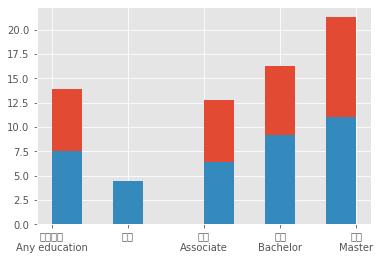

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')#画图工具
from pylab import mpl #matplotlib中的一部分
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
attr = ['学历不限\nAny education', '高中', '大专\nAssociate',
        '本科\nBachelor', '硕士\nMaster']
value1 = [13.9, np.nan, 12.8, 16.3, 21.3]
value2 = [7.5, 4.4, 6.4, 9.2, 11.0]

plt.hist(x=attr, weights=value1,histtype='bar',label="不同学历的英语外教与中教工资对比")
plt.hist(x=attr, weights=value2,histtype='bar',label="不同学历的英语外教与中教工资对比")
# plt.pie(x = value2, labels=attr)
plt.show
# bar = Bar("不同学历的英语外教与中教工资对比", width = 700,height=500)
# bar.add("外教", attr, value1, xaxis_label_textsize=15, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar.add("中教", attr, value2, xaxis_label_textsize=15, legend_top=30,
#         yaxis_label_textsize=20, is_label_show=True)
# bar

#### 2. 市场对于洋外教的经验和学历要求如何？

In [ ]:
exp_demand = np.round(data_jlc['exp_title_clean'].value_counts()/data_jlc['exp_title_clean'].value_counts().sum()*100, 1)

In [ ]:
bar = Bar("不同经验英语外教需求百分比(%)", width = 500,height=500)

bar.add("", ['入门', '中高级', '管理', '主任', '实习'], exp_demand.values,  xaxis_label_textsize=20, 
        yaxis_label_textsize=20, is_label_show=True)
bar

In [ ]:
degree_demand = np.round(data_jlc['education'].value_counts()/data_jlc['education'].value_counts().sum()*100, 1)

In [ ]:
bar = Bar("不同学历英语外教需求百分比(%)", width = 500,height=500)

bar.add("", ['本科', '学历不限', '社区大学', '硕士'], degree_demand.values,  xaxis_label_textsize=18, 
        yaxis_label_textsize=20, is_label_show=True)
bar

### 3. 哪些地区对洋外教的需求多？

In [ ]:
area_demand = data_jlc['area'].value_counts().nlargest(11).drop('Others')

In [ ]:
bar = Bar("对外教需求排名前10的城市", width = 600,height=500)

bar.add("", ['北京', '上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛'], 
        area_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar

In [ ]:
salary_area = np.round(data_jlc.groupby('area')['salary_clean'].mean()[area_demand.index], 1)

In [ ]:
salary_area

In [ ]:
# 中教对应城市的平均薪酬
city10 = ['北京', '上海', '杭州', '深圳', '成都', '重庆', '广州', '武汉', '南京', '青岛']
np.round(data_wx[data_wx['city'].isin(city10)].groupby('city')['salary_clean'].mean(), 1)

In [ ]:
bar = Bar("对外教需求排名前10的城市的外教和中教平均工资", width = 800,height=500)

bar.add("外教", city10, salary_area.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, legend_top=30)
bar.add("中教", city10, [9.8, 9.3, 8.9, 8.6, 8.9, 8.0, 8.0, 6.9, 8.0, 7.8],  
        xaxis_label_textsize=18, yaxis_label_textsize=20, is_label_show=True, legend_top=30)
bar

#### 4. 什么机构在招聘洋外教？

In [ ]:
com_type_demand = data_jlc['com_type'].value_counts().nlargest(5)

In [ ]:
com_type_demand

In [ ]:
bar = Bar("对外教需求排名前5的单位类型", width = 600,height=500)

bar.add("", ['培训机构', '学校', '咨询机构', '其它', '外包机构'], 
        com_type_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar

In [ ]:
np.round(data_jlc.loc[data_jlc['com_type'] =='Teaching Center', 'education'].value_counts()/562*100, 1)

In [ ]:
salary_com_type = np.round(data_jlc.groupby('com_type')['salary_clean'].mean()[com_type_demand.index], 1)

In [ ]:
salary_com_type

In [ ]:
bar = Bar("对外教需求排名前5的单位类型的外教平均工资", width = 600,height=500)

bar.add("", ['培训机构', '学校', '咨询机构', '其它', '外包机构'], 
        salary_com_type.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar

In [ ]:
data_jlc[data_jlc['com_type']=='Teaching Center'].groupby('education')['com_type'].count()/562

In [ ]:
company = data_jlc['company'].value_counts().nlargest(50)

In [ ]:
from pyecharts import WordCloud

wordcloud = WordCloud(width=1000, height=600)
wordcloud.add("", company.index, company.values, word_size_range=[20, 100])
wordcloud

### 5. 洋外教来源真的很乱吗？

In [ ]:
data_gm.info()

In [ ]:
data_gm.sample(5)

In [ ]:
sex = data_gm['Sex'].value_counts()

In [ ]:
from pyecharts import Pie


pie =Pie('性别比例',background_color = 'white', width=500, height=500)
pie.add('',['男性', '女性', '未知'],sex.values, 
        center = [50,50],radius=[25, 50],rosetype='radius', is_label_show=True,
       legend_text_size=16, label_text_size=16)
pie

In [ ]:
data_gm['Province2'] = data_gm['Province'].str.extract(r"([a-z|A-Z]*\s?[a-z|A-Z]*)")

In [ ]:
province = data_gm['Province2'].value_counts().drop('')

In [ ]:
province

In [ ]:
wordcloud = WordCloud(width=1000, height=600)
wordcloud.add("", province.index, province.values, word_size_range=[20, 60])
wordcloud

## 练习
将中文编译成英文，并找到对应关系
**目前给到的中文对应关系是这样**

禁限售对应的风险标签：
禁限售、非法政治、暴恐分裂、枪支弹药、管制器具、军警用品、管制药品、色情暴力、低俗、儿童剥削、毒品及相关工具、危险化学品、易燃易爆物品、赌博、动植物及捕杀工具、非法用途产品、非法服务、烟草及相关产品、兽药、医疗器械、植物、食品

知识产权侵权对应的风险标签：
知识产权侵权、普通品牌、高危品牌

商家欺诈对应的风险标签：
商家欺诈、超低价商品


In [ ]:
import pandas as pd

data_cn = pd.read_csv("/Users/chenqiang/Documents/interesting-python/ESL/code_and_name.csv")
# print(data_cn.sample(105))
exp_map = {
"禁限售":"禁限售"
,"非法政治":"禁限售"
,"暴恐分裂":"禁限售"
,"枪支弹药":"禁限售"
,"管制器具":"禁限售"
,"军警用品":"禁限售"
,"管制药品":"禁限售"
,"色情暴力":"禁限售"
,"低俗":"禁限售"
,"儿童剥削":"禁限售"
,"毒品及相关工具":"禁限售"
,"危险化学品":"禁限售"
,"易燃易爆物品":"禁限售"
,"赌博":"禁限售"
,"动植物及捕杀工具":"禁限售"
,"非法用途产品":"禁限售"
,"非法服务":"禁限售"
,"烟草及相关产品":"禁限售"
,"兽药":"禁限售"
,"医疗器械":"禁限售"
,"植物":"禁限售"
,"食品":"禁限售"
,"知识产权侵权":"知识产权侵权"
,"普通品牌":"知识产权侵权"
,"高危品牌":"知识产权侵权"
}
data_cn['new'] = data_cn['name'].map(exp_map)
pd.set_option('display.max_rows', None)  # 行
print(data_cn)
r=data_cn.dropna(axis=0, how='any', 
                     thresh=None, subset= ['new'], inplace=False)
print(r)
r.to_csv('new.csv',index = False)
